In [1]:
!pip install tensorflow-gpu


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('Churn_Modelling.csv')

In [5]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
## Divide The data set into indepenedent and dependent featues
X = data.iloc[:,3:13]
y = data.iloc[:,13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [9]:
## Features Engineering
geography=pd.get_dummies(X["Geography"],drop_first= True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [10]:
## Features Engineering - Ensuring X is fully numerical
geography=pd.get_dummies(X["Geography"],drop_first= True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

# Drop original categorical columns
X = X.drop(["Geography","Gender"],axis=1)

# Concatenate the new dummy variables
X = pd.concat([X,geography,gender],axis=1)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [12]:
# This cell is now redundant as its logic has been merged into rAXQUGBRmTD_
# It can be removed or left as an empty placeholder if desired.

In [13]:
# Splitting Dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
# feature Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [17]:
X_train.shape , X_test.shape

((8000, 11), (2000, 11))

In [18]:
## Part 2 Now lets Create The Ann
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [19]:
## Lets initialize the ANN
classifier = Sequential()

In [20]:
## Add input Layer
classifier.add(Dense(units=11,activation='relu'))

In [21]:
## Adding First Hidden Layer
classifier.add(Dense(units=7,activation='relu'))

In [22]:
## Adding Second Hidden Layer
classifier.add(Dense(units=6,activation='relu'))

In [23]:
## Adding Output Layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [24]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
"""import tensorflow
tesnorflow.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam', **kwargs)"""

"import tensorflow \ntesnorflow.keras.optimizers.Adam(\n    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,\n    name='Adam', **kwargs)"

In [26]:
## Early Stopping
import tensorflow as tf
early_stopping= tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [27]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks = early_stopping)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7945 - loss: 0.5157 - val_accuracy: 0.7955 - val_loss: 0.4589
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7949 - loss: 0.4537 - val_accuracy: 0.7952 - val_loss: 0.4369
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8002 - loss: 0.4334 - val_accuracy: 0.7993 - val_loss: 0.4315
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8010 - loss: 0.4338 - val_accuracy: 0.8111 - val_loss: 0.4283
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8213 - loss: 0.4191 - val_accuracy: 0.8164 - val_loss: 0.4260
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8239 - loss: 0.4193 - val_accuracy: 0.8175 - val_loss: 0.4231
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8305 - loss: 0.4062 - val_accuracy: 0.8194 - val_loss: 0.4226
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8269 - loss: 0.4103 - val_accu

In [28]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 0, 'epoch')

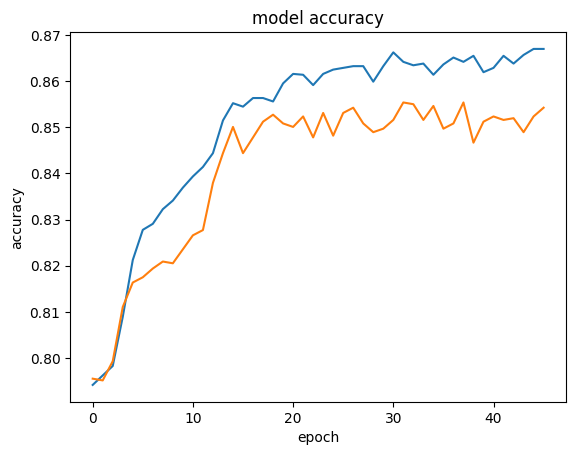

In [29]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

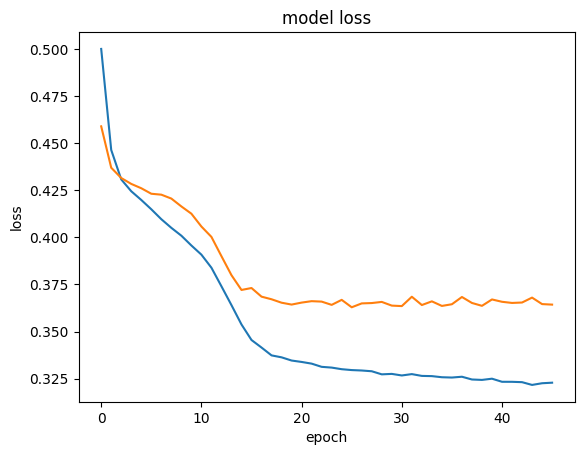

In [30]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

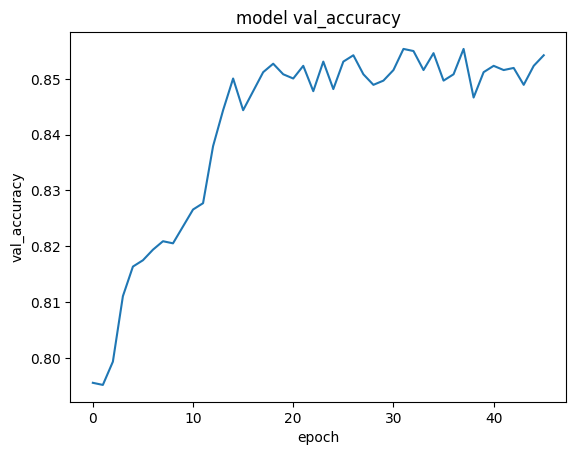

In [31]:
# Summarize history for val_accuracy
plt.plot(model_history.history['val_accuracy'])
plt.title('model val_accuracy')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')



Text(0.5, 0, 'epoch')

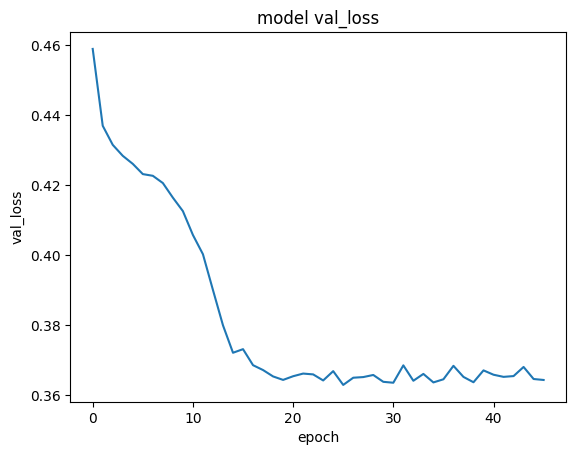

In [32]:
# Summarize history for val_loss
plt.plot(model_history.history['val_loss'])
plt.title('model val_loss')
plt.ylabel('val_loss')
plt.xlabel('epoch')


In [33]:
# Part 3 - Making the prediction and evaluating the model
# Predicting the test set result
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [34]:
## Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [35]:
cm

array([[1507,   88],
       [ 201,  204]])

In [36]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [37]:
score

0.8555

In [38]:
## Get the weights
classifier.get_weights()


[array([[ 0.1617878 ,  0.07875422,  0.13394737,  0.15413369, -0.01187579,
         -0.09206337,  0.00125127, -0.01659211,  0.24373628,  0.30136275,
          0.29673946],
        [ 0.04226632, -0.4851025 , -0.08964212,  0.27623466,  0.35313144,
          0.26878792,  0.20458561, -0.94402254, -0.67366594,  0.15701295,
         -0.8993963 ],
        [-0.00476787,  0.23588386, -0.5504792 ,  0.01505479, -0.25503626,
          0.38722977, -0.02860265,  0.03568657,  0.16613875,  0.2198692 ,
         -0.24118696],
        [ 0.47841528, -0.85115   , -0.11066103, -0.15045552, -0.05656978,
          0.5228498 ,  0.09421442,  0.04260256,  0.08823112, -0.86847943,
          0.15672037],
        [ 1.0148304 ,  0.5420156 , -0.22040543, -0.155067  ,  0.01662054,
         -0.4607593 , -1.23259   , -0.09403574, -0.19167547, -0.43557942,
          0.04998972],
        [ 0.14826873,  0.06880285,  0.31926435,  0.3905411 , -0.6133891 ,
          0.22757162, -0.05487853, -0.18559618,  0.10006315,  0.1046379